In this notebook, we will clean and transform the raw data that we downloaded from the LOS ANGELES OPEN DATA - CITY OF LOS ANGELES site. 

In [1]:
import pandas as pd
from sodapy import Socrata
pd.set_option('display.max_columns', None)
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
client = Socrata('data.lacity.org',
                 'AppToken,
                 username='username'
                 password='password')

# results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get_all("cpkv-aajs")

In [3]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
# check for nulls
print(results_df.isna().sum())

# nulls are in rows I will not be using, can proceed

zip_code                                       0
address_end                                    0
floor_area_l_a_building_code_definition       26
work_description                               2
reference_old_permit                           8
census_tract                                   2
permit_category                                0
initiating_office                              0
assessor_parcel                               34
applicant_first_name                         785
zone                                          33
assessor_book                                 34
applicant_address_1                         4776
license_type                                   0
valuation                                      9
of_residential_dwelling_units                  0
pcis_permit                                    0
address_start                                  0
street_name                                    0
street_suffix                                323
street_direction    

In [5]:
# create a copy df to make changes to
transformed_df = results_df.copy()
# obtain only the relevant columns
transformed_df = transformed_df.filter(items =['pcis_permit', 'zipcode', 'work_description', 'census_tract', 
                              'permit_category', 'initiating_office', 'valuation', 'of_residential_dwelling_units',
                              'address_start','street_direction', 'street_name', 'street_suffix',
                              'zip_code', 'issue_date', 'permit_sub_type', 'of_stories'])

In [6]:
# convert valuation to float
transformed_df['valuation'] = transformed_df['valuation'].astype('float')

average_valuation = transformed_df['valuation'].mean()
print(average_valuation)

1260001.5580502378


In [7]:
# convert issue_date to datetime data type
transformed_df['issue_date'] = transformed_df['issue_date'].astype('datetime64')
issue_year = transformed_df['issue_date'].dt.year
issue_month = transformed_df['issue_date'].dt.month
issue_day = transformed_df['issue_date'].dt.day

# separate date for easier analysis on the year and month level
transformed_df.insert(loc=12, column='issue_year', value=issue_year)
transformed_df.insert(loc=13, column='issue_month', value=issue_month)
transformed_df.insert(loc=14, column='issue_day', value=issue_day)
display(transformed_df.info())
display(transformed_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23776 entries, 0 to 23775
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   pcis_permit                    23776 non-null  object        
 1   work_description               23774 non-null  object        
 2   census_tract                   23774 non-null  object        
 3   permit_category                23776 non-null  object        
 4   initiating_office              23776 non-null  object        
 5   valuation                      23767 non-null  float64       
 6   of_residential_dwelling_units  23776 non-null  object        
 7   address_start                  23776 non-null  object        
 8   street_direction               23451 non-null  object        
 9   street_name                    23776 non-null  object        
 10  street_suffix                  23453 non-null  object        
 11  zip_code       

None

,pcis_permit,work_description,census_tract,permit_category,initiating_office,valuation,of_residential_dwelling_units,address_start,street_direction,street_name,street_suffix,zip_code,issue_year,issue_month,issue_day,issue_date,permit_sub_type,of_stories
0,20010-20000-01945,"PROPOSED (51'-6"" X 101'-6"") IRREGULAR SHAPED S...",1393.01,Plan Check,VAN NUYS,800000.00000,1,5826,N,MELVIN,AVE,91356,2020,10,29,2020-10-29,1 or 2 Family Dwelling,2
1,17010-20000-00961,"NEW 24'-0"" x 45'-0"" TWO STORY SFD W/ ATTACHED ...",1871.02,Plan Check,VAN NUYS,178000.00000,1,3133,W,LACLEDE,AVE,90039,2018,5,2,2018-05-02,1 or 2 Family Dwelling,2
2,19010-20000-05164,TWO STORY SFD WITH ATTACHED 3 CAR GARAGE _STAN...,1082.02,Plan Check,VAN NUYS,604000.00000,1,20318,W,WINDSOR,LANE,91326,2020,3,3,2020-03-03,1 or 2 Family Dwelling,2
3,16010-30000-04199,New SFD with attached garage and recroom.,2721.00,Plan Check,WEST LA,1055000.00000,1,3715,S,WASATCH,AVE,90066,2017,5,22,2017-05-22,1 or 2 Family Dwelling,2
4,16010-20000-01617,PROPOSED IRR TWO STORY SFD WITH ATTACHED TWO C...,2719.02,Plan Check,VAN NUYS,462000.00000,1,3564,S,GRAND VIEW,BLVD,90066,2017,3,7,2017-03-07,1 or 2 Family Dwelling,2


After cleaning the dataset, I do some exploratory data analysis to see what is inside my dataset.

In [8]:
earliest_issue = transformed_df['issue_date'].min()
latest_issue = transformed_df['issue_date'].max()
print(earliest_issue, latest_issue)

2013-01-02 00:00:00 2022-07-08 00:00:00


Text(0.5, 1.0, 'Number of New Building Permits in Los Angeles, CA per Year')

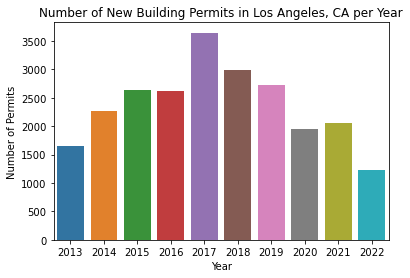

In [9]:
# plot how many permits have been given over time
year = transformed_df['issue_year']
permits_over_time_plot = sns.countplot(x=year)
permits_over_time_plot.set_xlabel(xlabel='Year')
permits_over_time_plot.set_ylabel(ylabel='Number of Permits')
plt.title(label='Number of New Building Permits in Los Angeles, CA per Year')

Text(0.5, 1.0, 'Number of New Building Permits per Initiating Office')

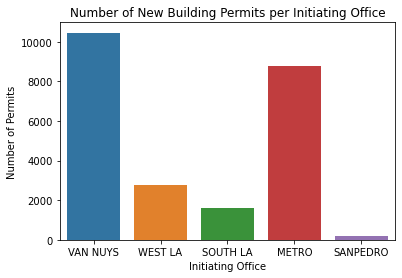

In [10]:
# number of permits per office 
offices = transformed_df['initiating_office']
permits_per_office_plot = sns.countplot(x=offices)
permits_per_office_plot.set_xlabel(xlabel='Initiating Office')
permits_per_office_plot.set_ylabel(ylabel='Number of Permits')
plt.title(label='Number of New Building Permits per Initiating Office')

In [11]:
# isolate number of permits per office in a dictionary

office_names = transformed_df.initiating_office.unique()
permits_per_office = {}
for office in office_names:
    permits_per_office[office] = transformed_df['initiating_office'].value_counts()[office]
print(permits_per_office)

{'VAN NUYS': 10459, 'WEST LA': 2759, 'SOUTH LA': 1598, 'METRO': 8761, 'SANPEDRO': 199}


In [12]:
# number of permits per office in a df
transformed_df['initiating_office'].value_counts()

VAN NUYS    10459
METRO        8761
WEST LA      2759
SOUTH LA     1598
SANPEDRO      199
Name: initiating_office, dtype: int64

Text(0.5, 1.0, 'Number of New Building Permits per Office per Year')

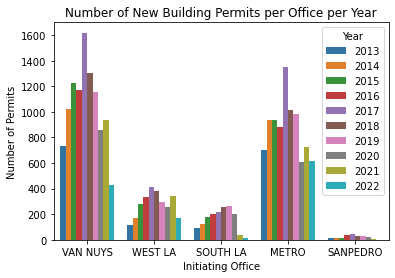

In [13]:
# number of permits per office per year 
permits_per_office_time = sns.countplot(x=offices, hue=year)
permits_per_office_time.set_xlabel(xlabel='Initiating Office')
permits_per_office_time.set_ylabel(ylabel='Number of Permits')
plt.legend(title='Year')
plt.title(label='Number of New Building Permits per Office per Year')

In [14]:
# permits per year per office as a df
permits_per_year_per_office = transformed_df.groupby(['initiating_office', 'issue_year']).size()
print(permits_per_year_per_office)

initiating_office  issue_year
METRO              2013           704
                   2014           935
                   2015           935
                   2016           880
                   2017          1351
                   2018          1018
                   2019           981
                   2020           610
                   2021           729
                   2022           618
SANPEDRO           2013            11
                   2014            11
                   2015            14
                   2016            36
                   2017            42
                   2018            32
                   2019            29
                   2020            20
                   2021             3
                   2022             1
SOUTH LA           2013            92
                   2014           127
                   2015           181
                   2016           205
                   2017           221
                   2

In [15]:
# analyze at the zip code level

permits_per_zipcode = transformed_df.groupby('zip_code').size()
print(permits_per_zipcode)
permits_per_zipcode_per_year = transformed_df.groupby(['zip_code', 'issue_year']).size()
print(permits_per_zipcode_per_year)


zip_code
90001    138
90002    190
90003    607
90004    382
90005     87
        ... 
91602    280
91604    400
91605    185
91606    314
91607    280
Length: 115, dtype: int64
zip_code  issue_year
90001     2013          17
          2014          17
          2015          14
          2016          20
          2017          18
                        ..
91607     2018          20
          2019          62
          2020          35
          2021          15
          2022          13
Length: 1040, dtype: int64


count    115.00000
mean     206.74783
std      184.40896
min        1.00000
25%       74.00000
50%      173.00000
75%      292.00000
max     1327.00000
dtype: float64

Text(0.5, 1.0, 'Number of New Building Permits by Type')

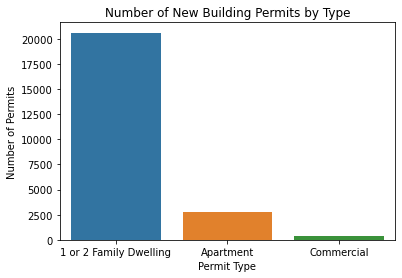

In [16]:
# analyze permit sub type
permits_sub_type = transformed_df['permit_sub_type']

sub_type_plot = sns.countplot(x=permits_sub_type)
sub_type_plot.set_xlabel(xlabel='Permit Type')
sub_type_plot.set_ylabel(ylabel='Number of Permits')
plt.title(label='Number of New Building Permits by Type')

Text(0.5, 1.0, 'Number of New Building Permits per Type per Year')

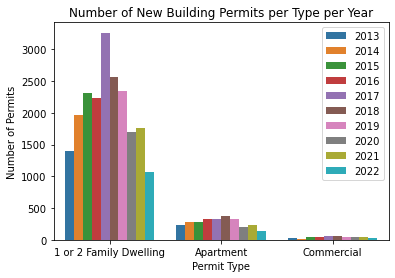

In [17]:
sub_type_plot_year = sns.countplot(x=permits_sub_type, hue=year)
sub_type_plot_year.set_xlabel(xlabel='Permit Type')
sub_type_plot_year.set_ylabel(ylabel='Number of Permits')
plt.legend()
plt.title(label='Number of New Building Permits per Type per Year')

Text(0.5, 1.0, 'Number of New Building Permits Per Office per Type')

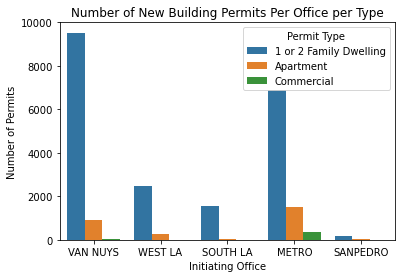

In [18]:
sub_type_plot_office = sns.countplot(x=offices, hue=permits_sub_type)
sub_type_plot_office.set_xlabel(xlabel='Initiating Office')
sub_type_plot_office.set_ylabel(ylabel='Number of Permits')
plt.legend(title='Permit Type')
plt.title(label='Number of New Building Permits Per Office per Type')

initiating_office
METRO      2381290.18563
SANPEDRO    364503.28854
SOUTH LA    307179.86540
VAN NUYS    592910.16540
WEST LA     843854.61409
Name: valuation, dtype: float64


(0.0, 2500000.0)

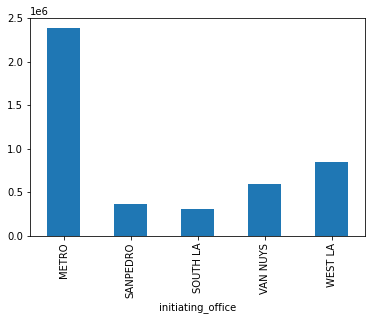

In [19]:
# analyze valuations
avg_valuation_by_office = transformed_df.groupby('initiating_office').mean()['valuation']
print(avg_valuation_by_office)
plot = avg_valuation_by_office.plot(kind='bar')
plot.set_ylim([0,2500000])


In [20]:
valuation_pivot = np.round(pd.pivot_table(transformed_df, 
                                 values=['valuation'], 
                                 index=['initiating_office', 'zip_code'],
                                 columns=['permit_sub_type'], 
                                 aggfunc=[np.mean, np.median, np.max]), 2)

valuation_pivot = valuation_pivot.sort_values(by=['initiating_office', 'zip_code'])
print(valuation_pivot)

                                             mean                \
                                        valuation                 
permit_sub_type            1 or 2 Family Dwelling     Apartment   
initiating_office zip_code                                        
METRO             90001              370381.45000   30000.00000   
                  90002              287885.81000 2455645.18000   
                  90003              341353.43000 2145583.87000   
                  90004              332735.91000 3965369.47000   
                  90005              267944.44000 8348437.57000   
...                                           ...           ...   
WEST LA           91602              327056.09000    7500.00000   
                  91604              491251.38000 3225590.00000   
                  91605              161000.00000 1866991.00000   
                  91606              229162.16000 1270000.00000   
                  91607              407973.56000 1600000.0000

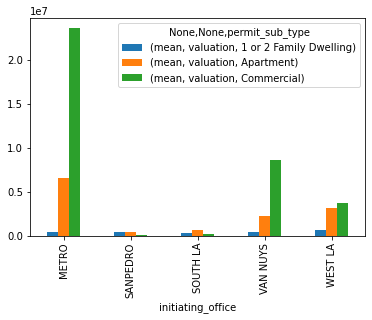

In [21]:
valuation_plot = np.round(pd.pivot_table(transformed_df,
                                        values=['valuation'],
                                        index=['initiating_office'],
                                        columns=['permit_sub_type'],
                                        aggfunc=[np.mean]),2).plot.bar()

In [25]:
# export to excel to use in further analysis

transformed_df.to_excel(r'transformed_city_permit_data.xlsx')

In [24]:
transformed_df.head()

,pcis_permit,work_description,census_tract,permit_category,initiating_office,valuation,of_residential_dwelling_units,address_start,street_direction,street_name,street_suffix,zip_code,issue_year,issue_month,issue_day,issue_date,permit_sub_type,of_stories
0,20010-20000-01945,"PROPOSED (51'-6"" X 101'-6"") IRREGULAR SHAPED S...",1393.01,Plan Check,VAN NUYS,800000.00000,1,5826,N,MELVIN,AVE,91356,2020,10,29,2020-10-29,1 or 2 Family Dwelling,2
1,17010-20000-00961,"NEW 24'-0"" x 45'-0"" TWO STORY SFD W/ ATTACHED ...",1871.02,Plan Check,VAN NUYS,178000.00000,1,3133,W,LACLEDE,AVE,90039,2018,5,2,2018-05-02,1 or 2 Family Dwelling,2
2,19010-20000-05164,TWO STORY SFD WITH ATTACHED 3 CAR GARAGE _STAN...,1082.02,Plan Check,VAN NUYS,604000.00000,1,20318,W,WINDSOR,LANE,91326,2020,3,3,2020-03-03,1 or 2 Family Dwelling,2
3,16010-30000-04199,New SFD with attached garage and recroom.,2721.00,Plan Check,WEST LA,1055000.00000,1,3715,S,WASATCH,AVE,90066,2017,5,22,2017-05-22,1 or 2 Family Dwelling,2
4,16010-20000-01617,PROPOSED IRR TWO STORY SFD WITH ATTACHED TWO C...,2719.02,Plan Check,VAN NUYS,462000.00000,1,3564,S,GRAND VIEW,BLVD,90066,2017,3,7,2017-03-07,1 or 2 Family Dwelling,2
